In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap

In [2]:
df = gpd.read_file("Full Constituency Data.gpkg")

In [3]:
df.head()

,PCON24CD,constituency,LAT,LONG,region,country,2019_winner,2019_majority,turnout,con_2019,...,Muslim,Sikh,Other religion,Not answered,Owned outright,Owned with a mortgage or loan,Private rented,Social rented,Other tenure,geometry
0,E14001063,Aldershot,51.2903,-0.78648,SE,England,con,17985,67.5,29453,...,2.2,0.2,1.1,5.4,27.7,35.5,20.0,15.1,1.8,"POLYGON Z ((483364.601 160961.805 0.000, 48337..."
1,E14001064,Aldridge-Brownhills,52.6071,-1.93173,WM,England,con,22758,64.7,32941,...,2.2,5.2,0.5,5.0,42.0,33.2,10.7,13.4,0.7,"POLYGON Z ((406519.098 305054.298 0.000, 40648..."
2,E14001065,Altrincham and Sale West,53.3977,-2.39049,NW,England,con,6139,74.1,26311,...,6.4,0.4,0.4,5.0,37.7,36.4,13.8,11.4,0.6,"POLYGON Z ((377443.302 393344.296 0.000, 37745..."
3,E14001066,Amber Valley,53.0428,-1.39771,EM,England,con,16891,64.6,29118,...,0.2,0.2,0.5,5.8,39.2,30.7,14.8,14.7,0.6,"POLYGON Z ((436223.299 356984.804 0.000, 43624..."
4,E14001067,Arundel and South Downs,50.9580,-0.61585,SE,England,con,24105,75.5,35117,...,0.3,0.0,0.5,6.1,44.3,28.6,14.3,11.7,1.0,"POLYGON Z ((505688.454 133874.110 0.000, 50569..."


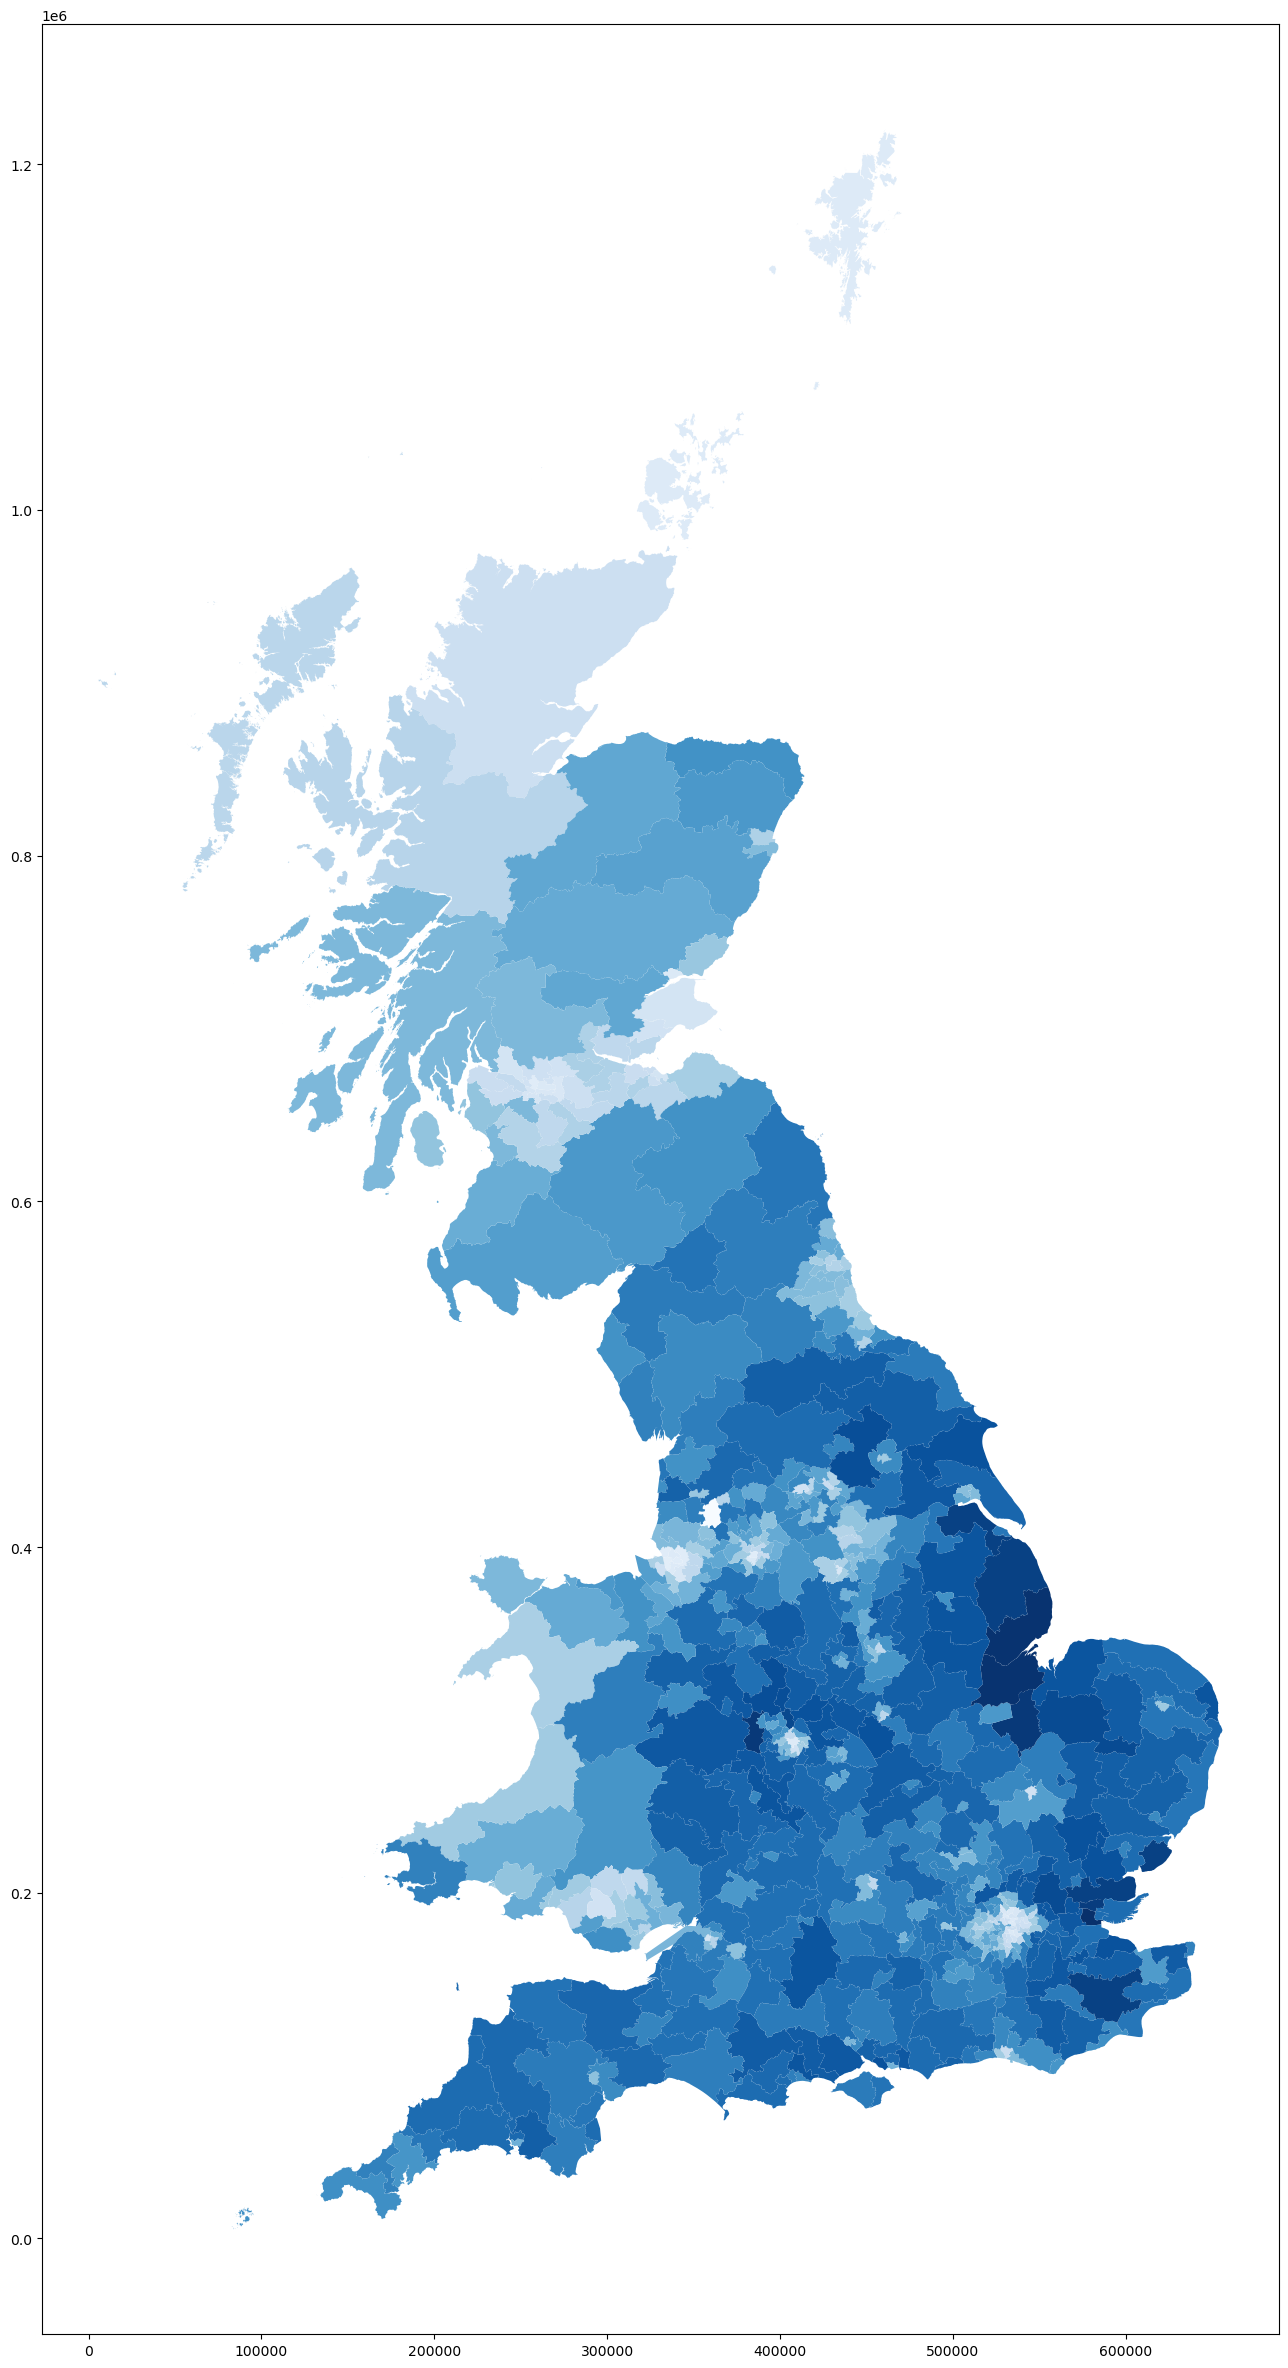

In [9]:
df.plot("con_%_2019", cmap="Blues", figsize=(30,30))
plt.show()

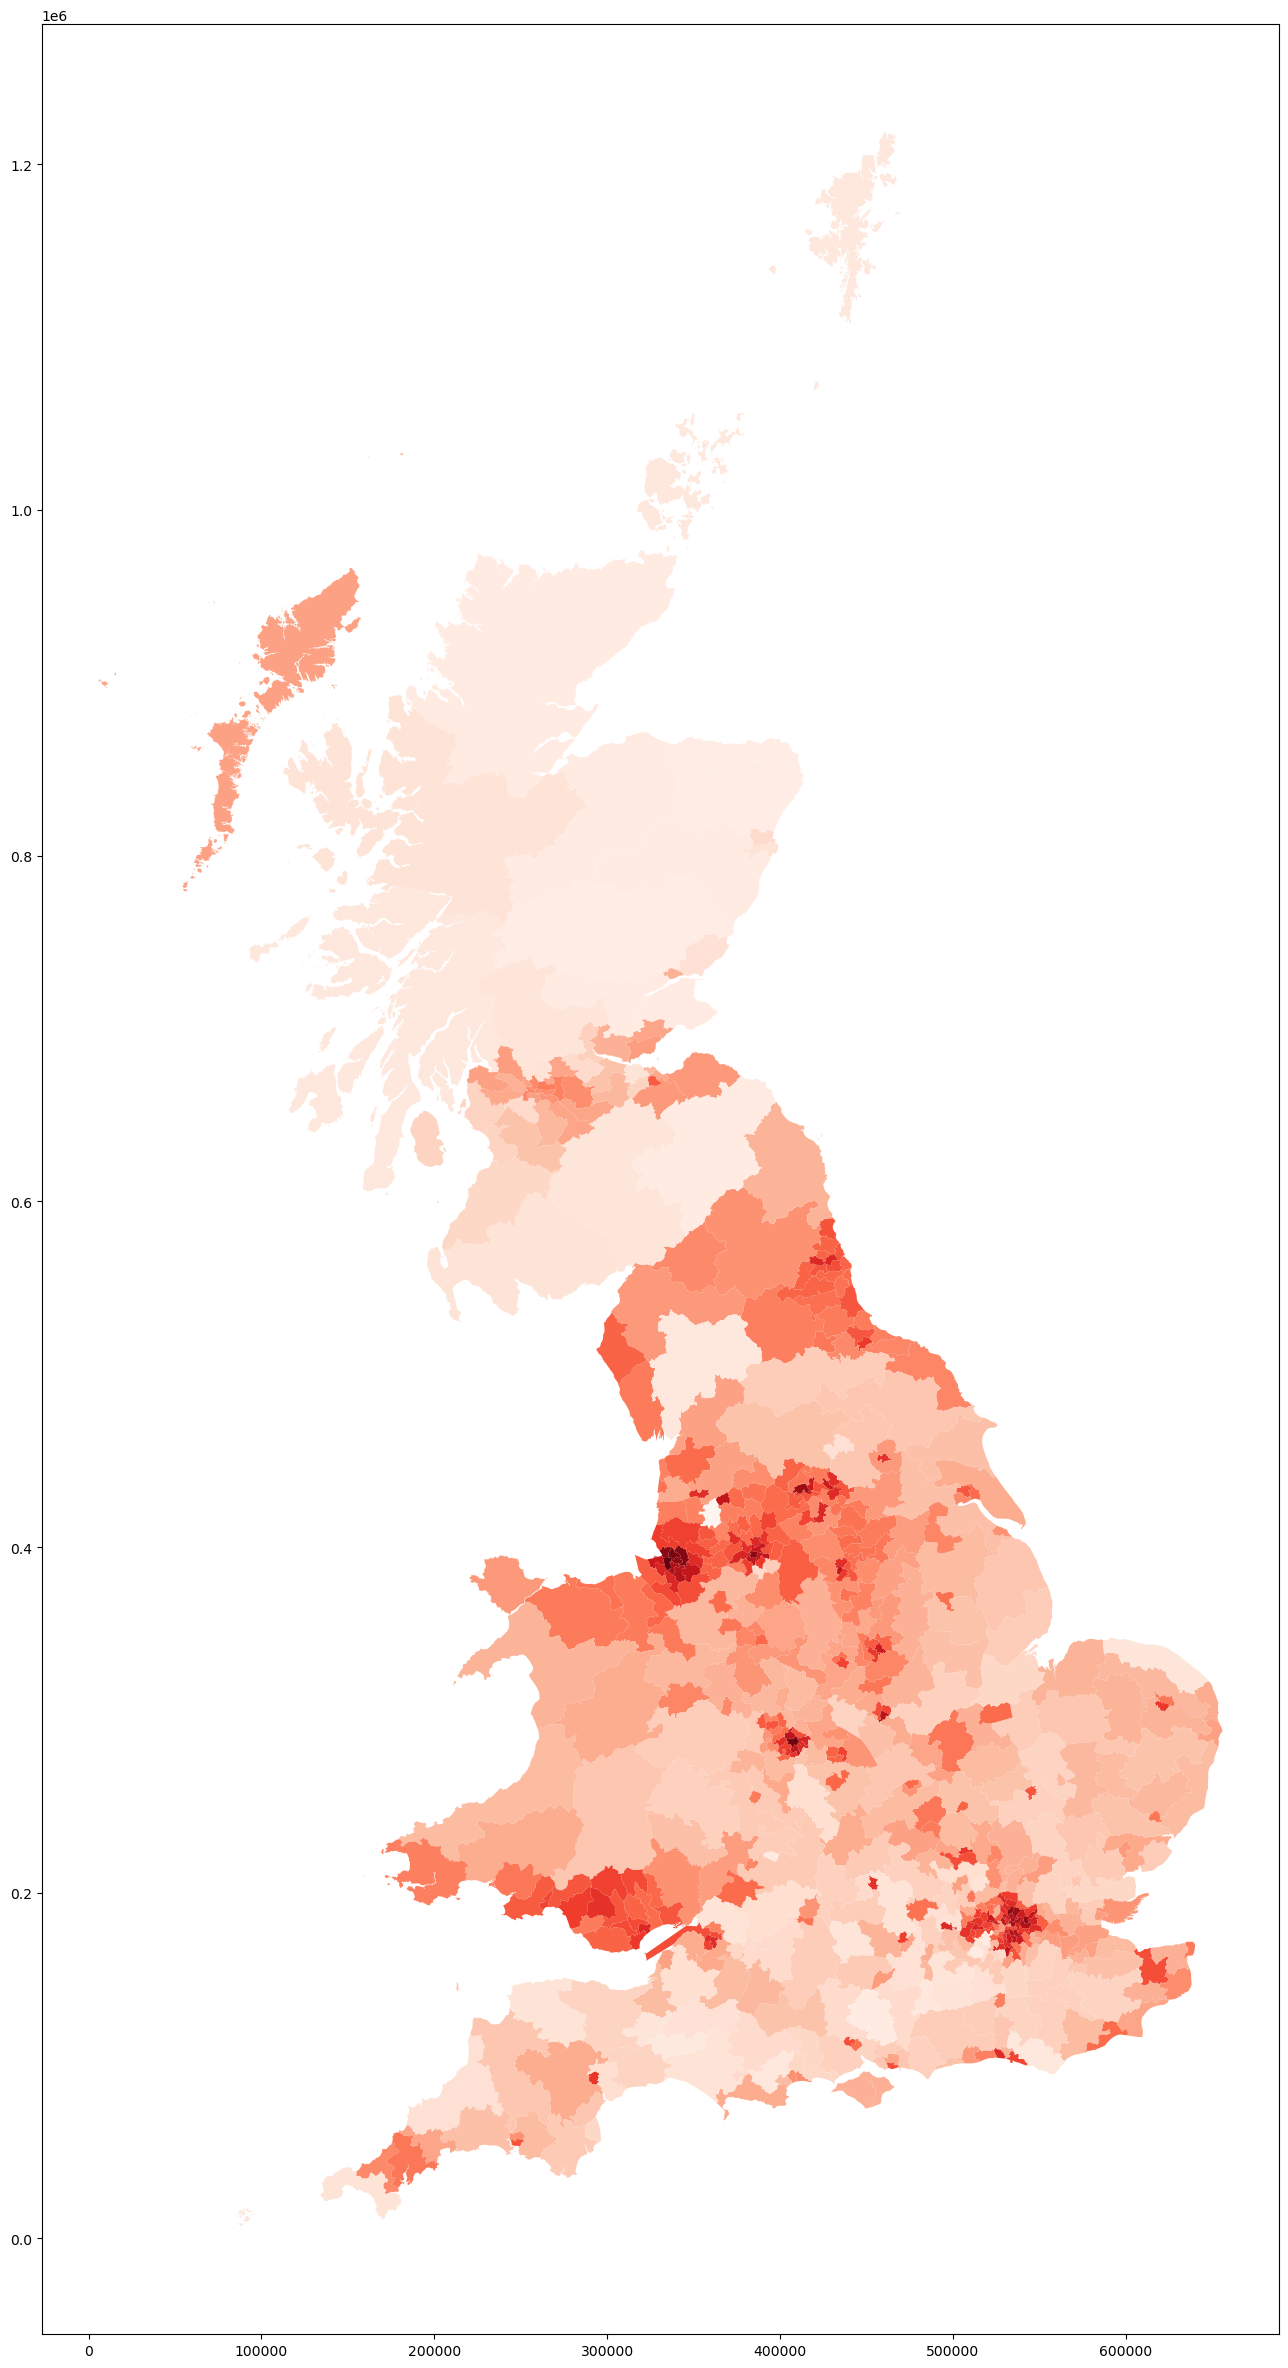

In [8]:
df.plot("lab_%_2019", cmap="Reds", figsize=(30,30))
plt.show()

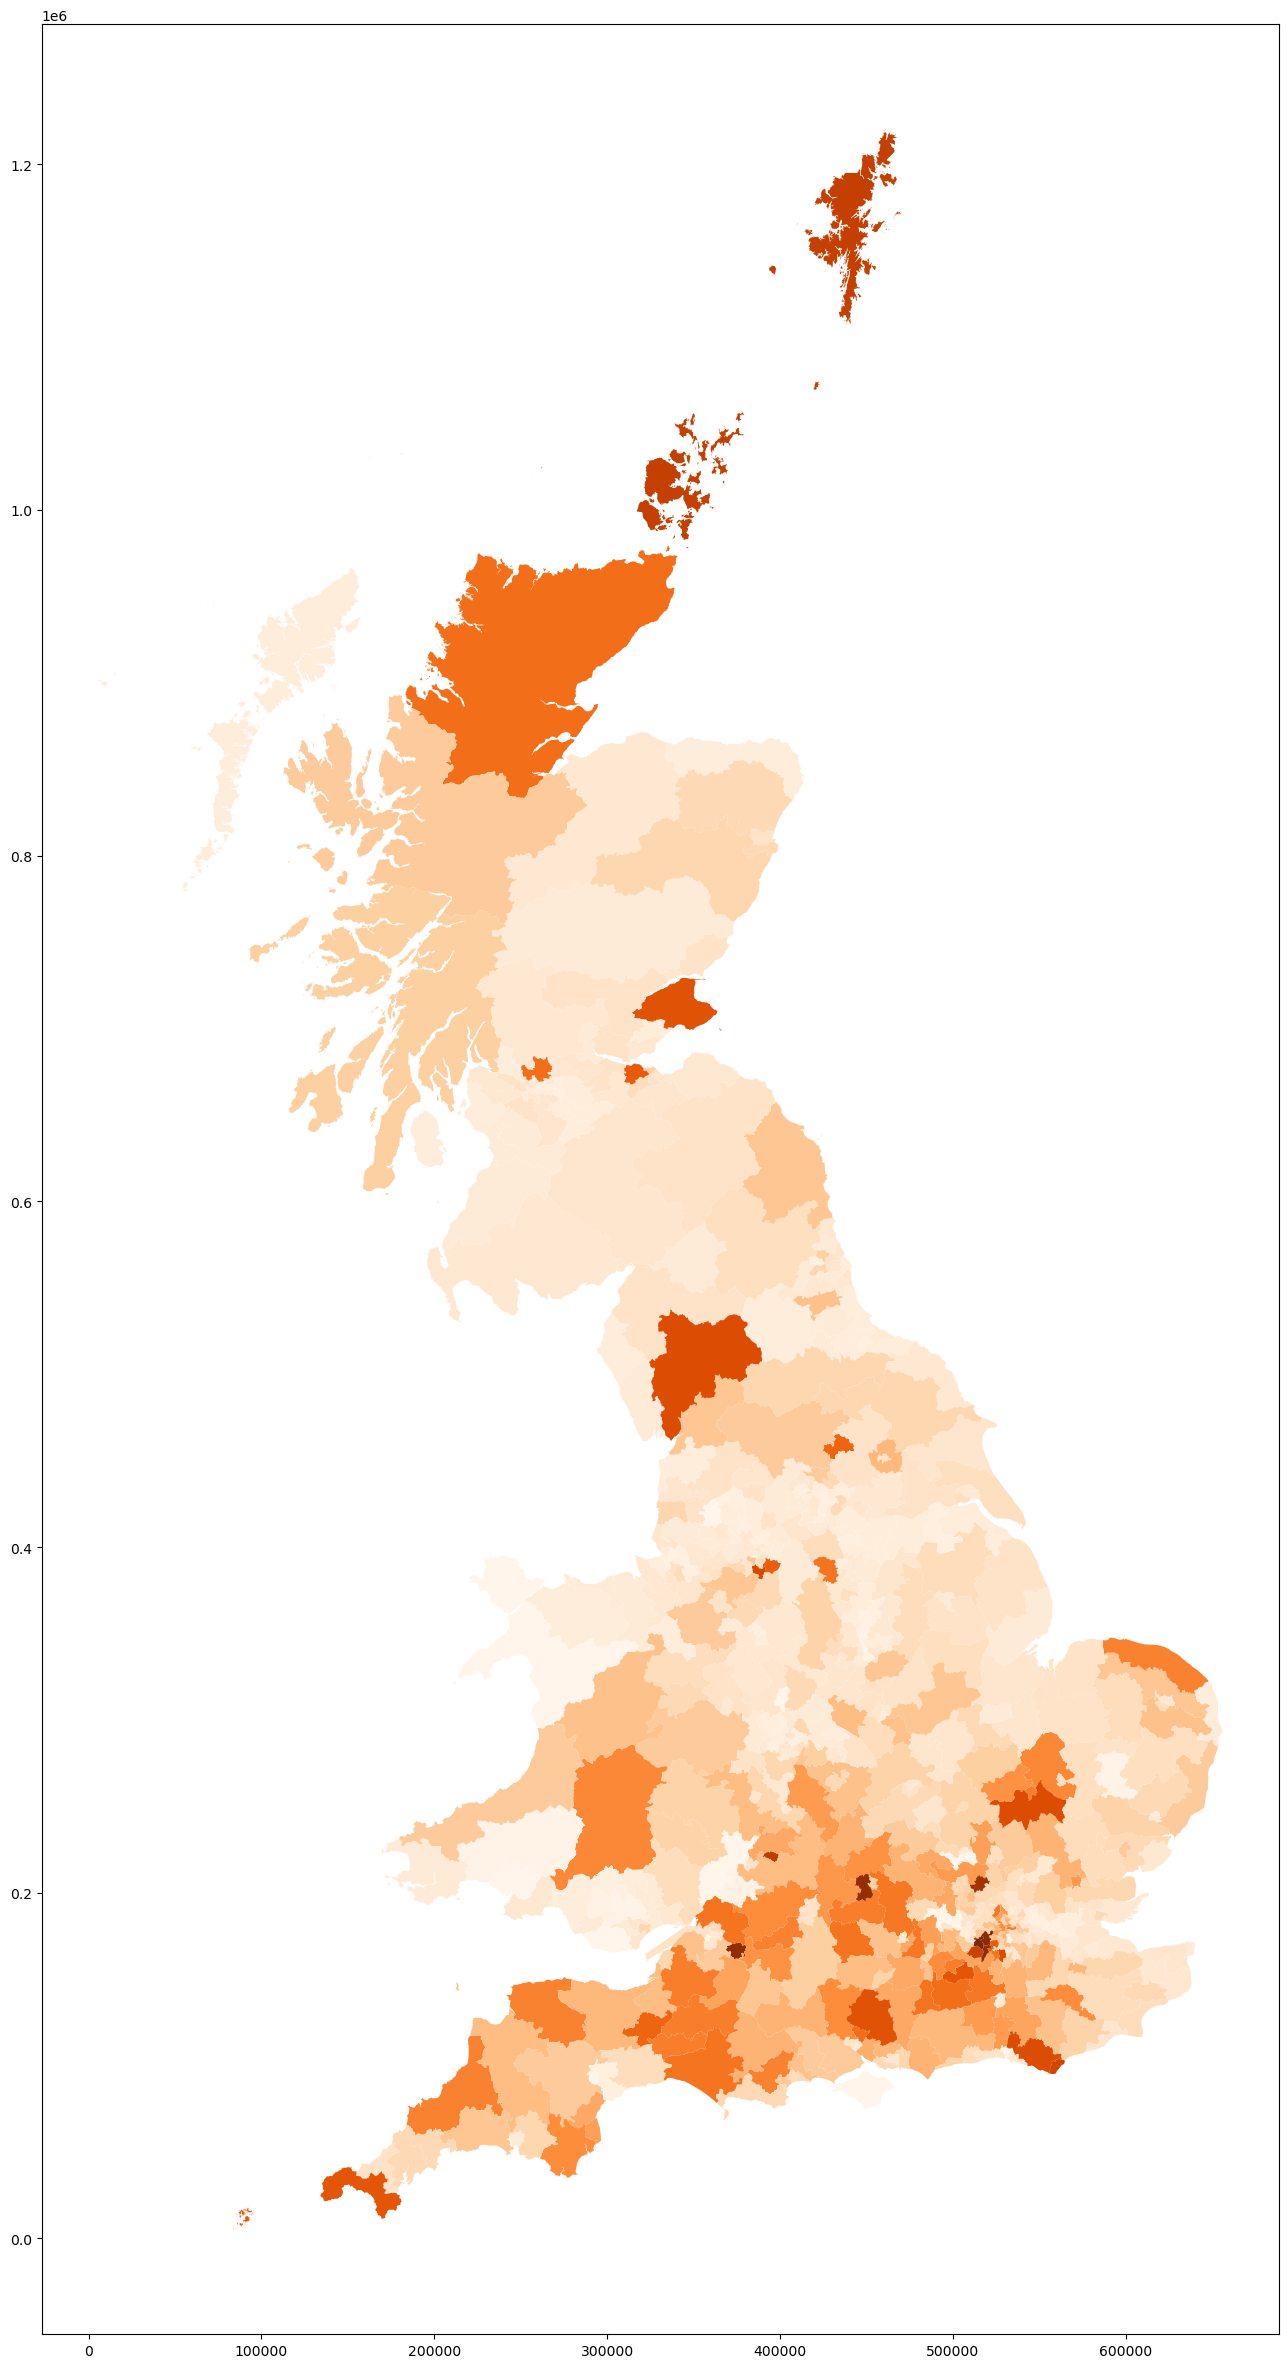

In [7]:
df.plot("ld_%_2019", cmap="Oranges", figsize=(30,30))
plt.show()

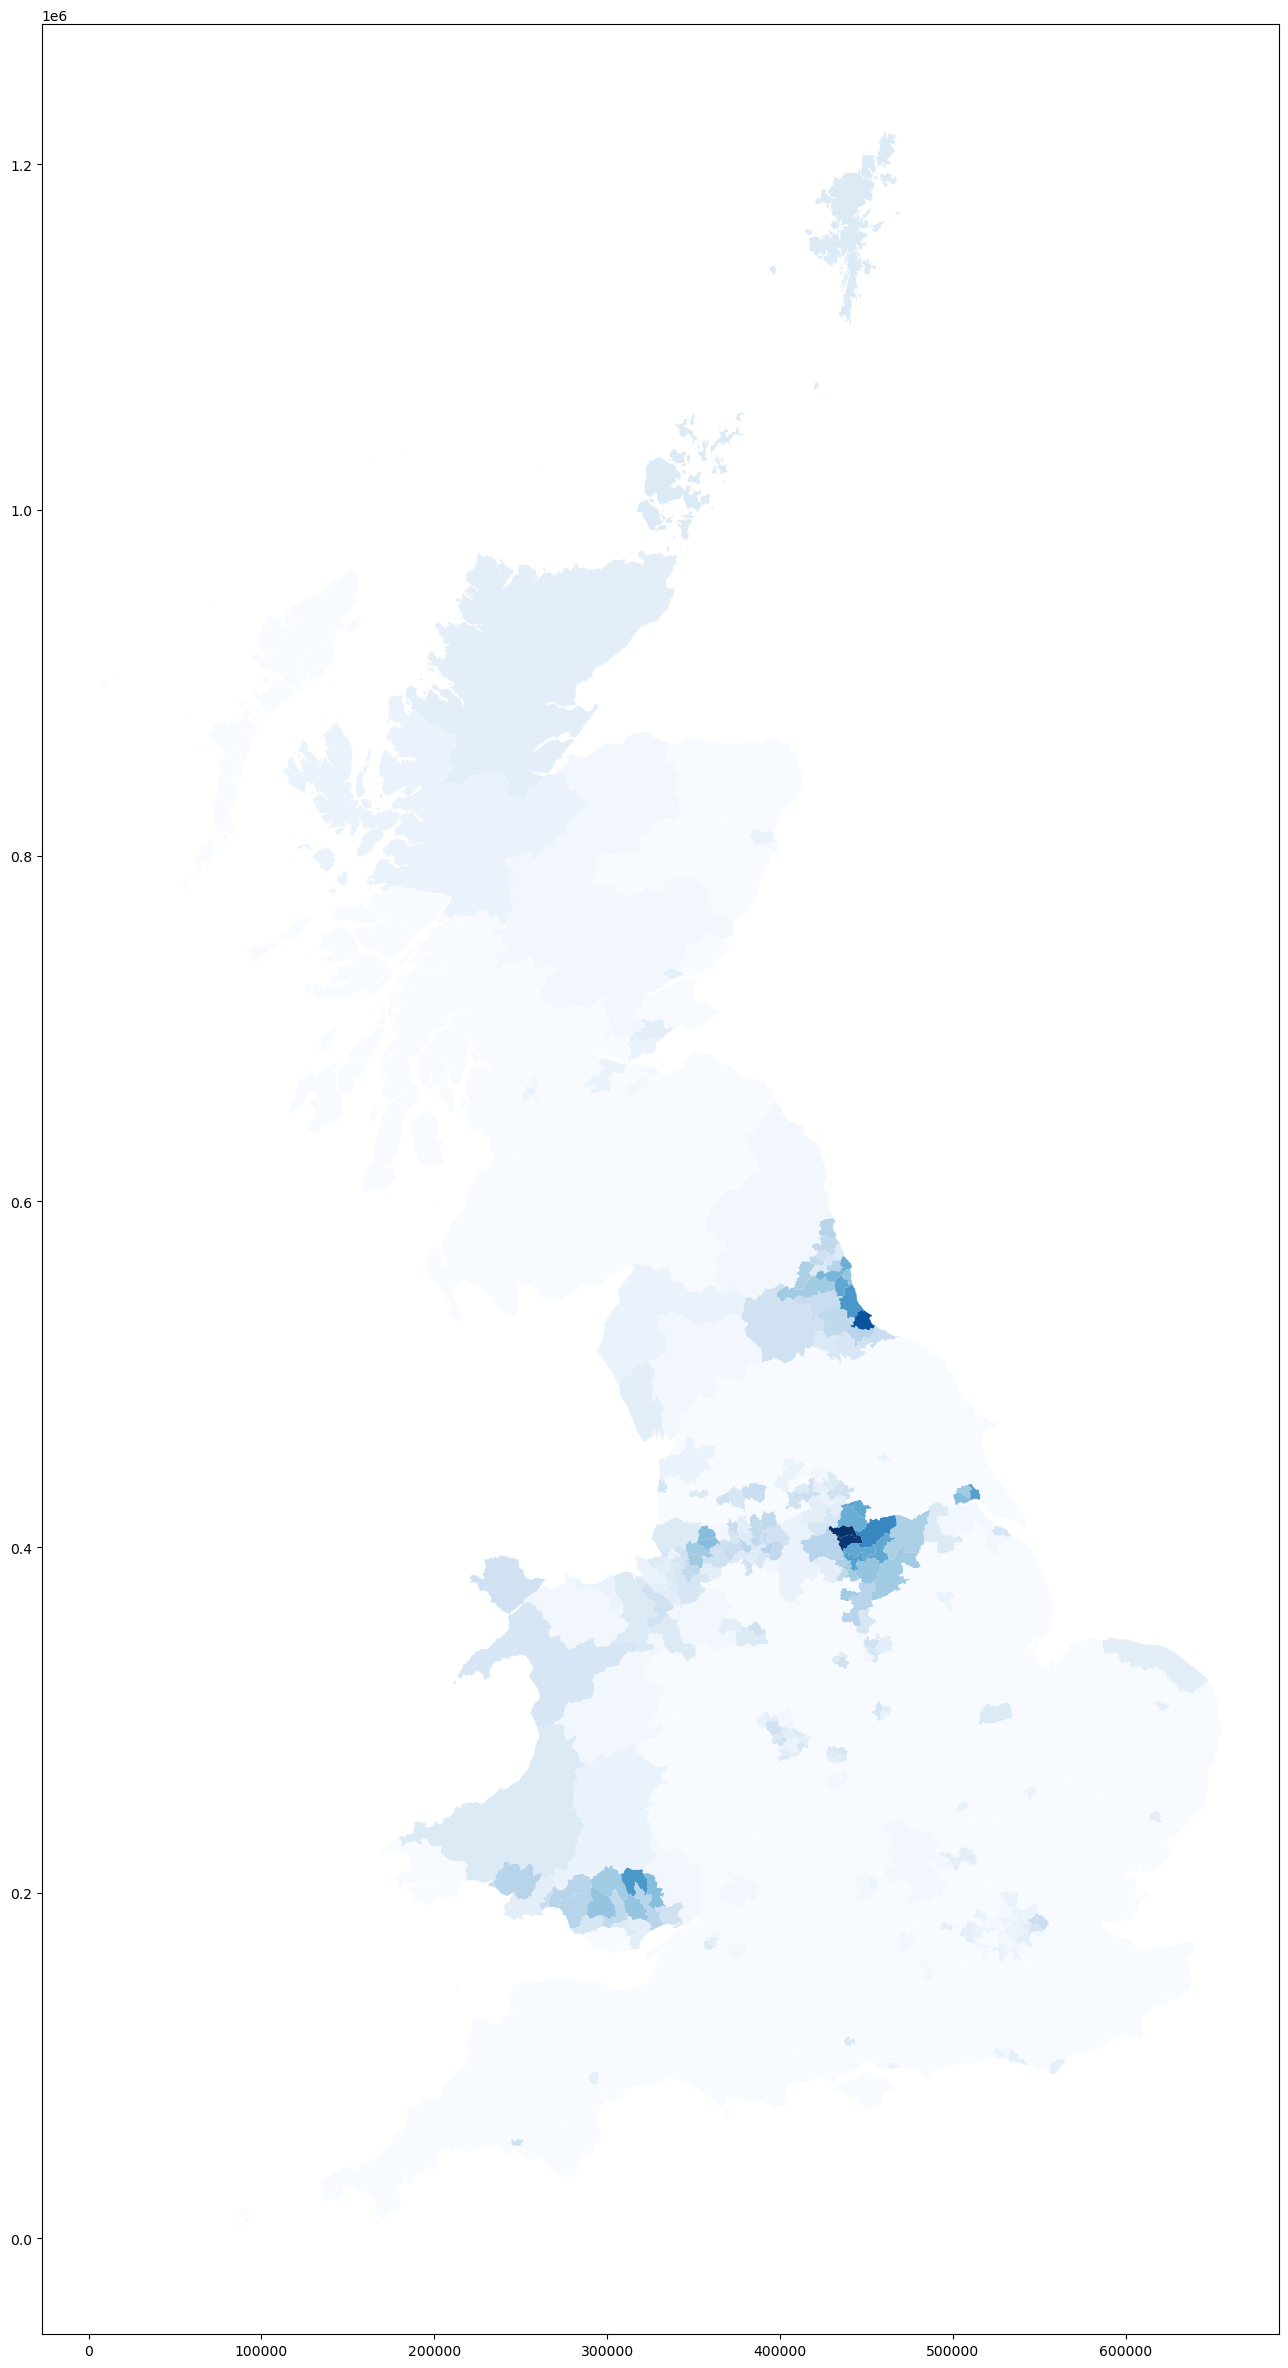

In [10]:
df.plot("ref_2019_%", cmap="Blues", figsize=(30,30))
plt.show()

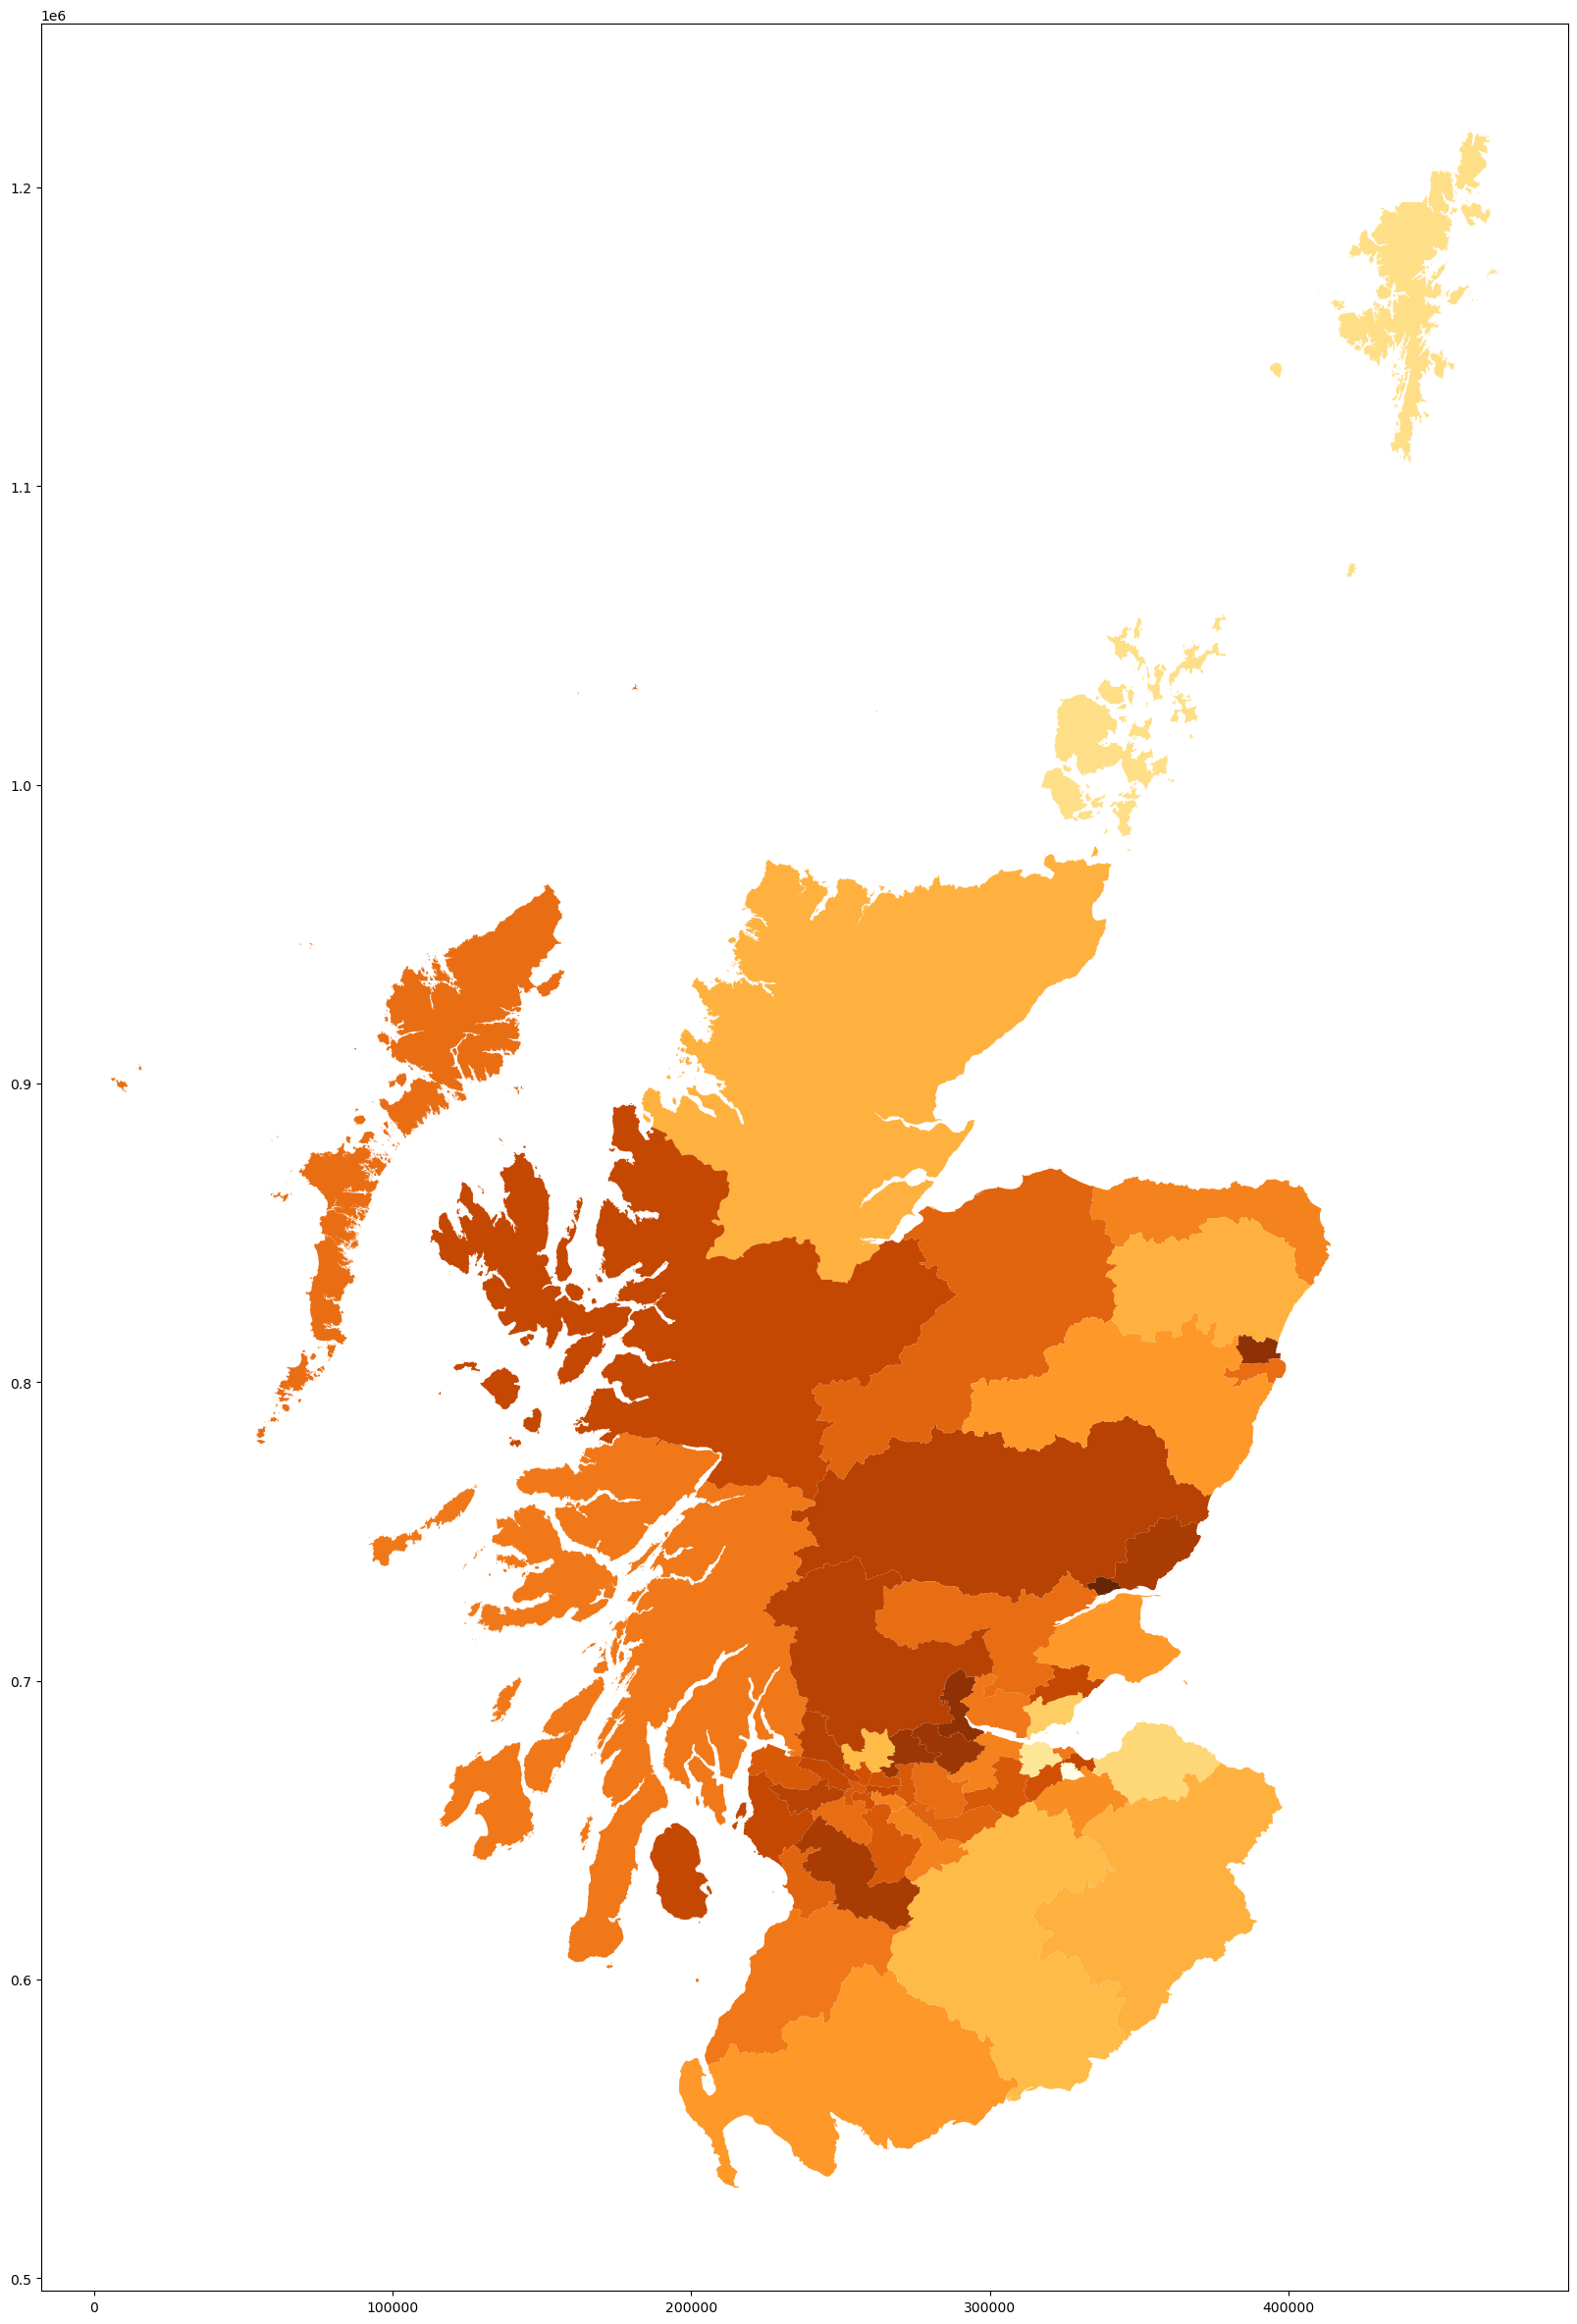

In [11]:
df[df["country"] == "Scotland"].plot("snp_2019_%", cmap="YlOrBr", figsize=(30,30))
plt.show()

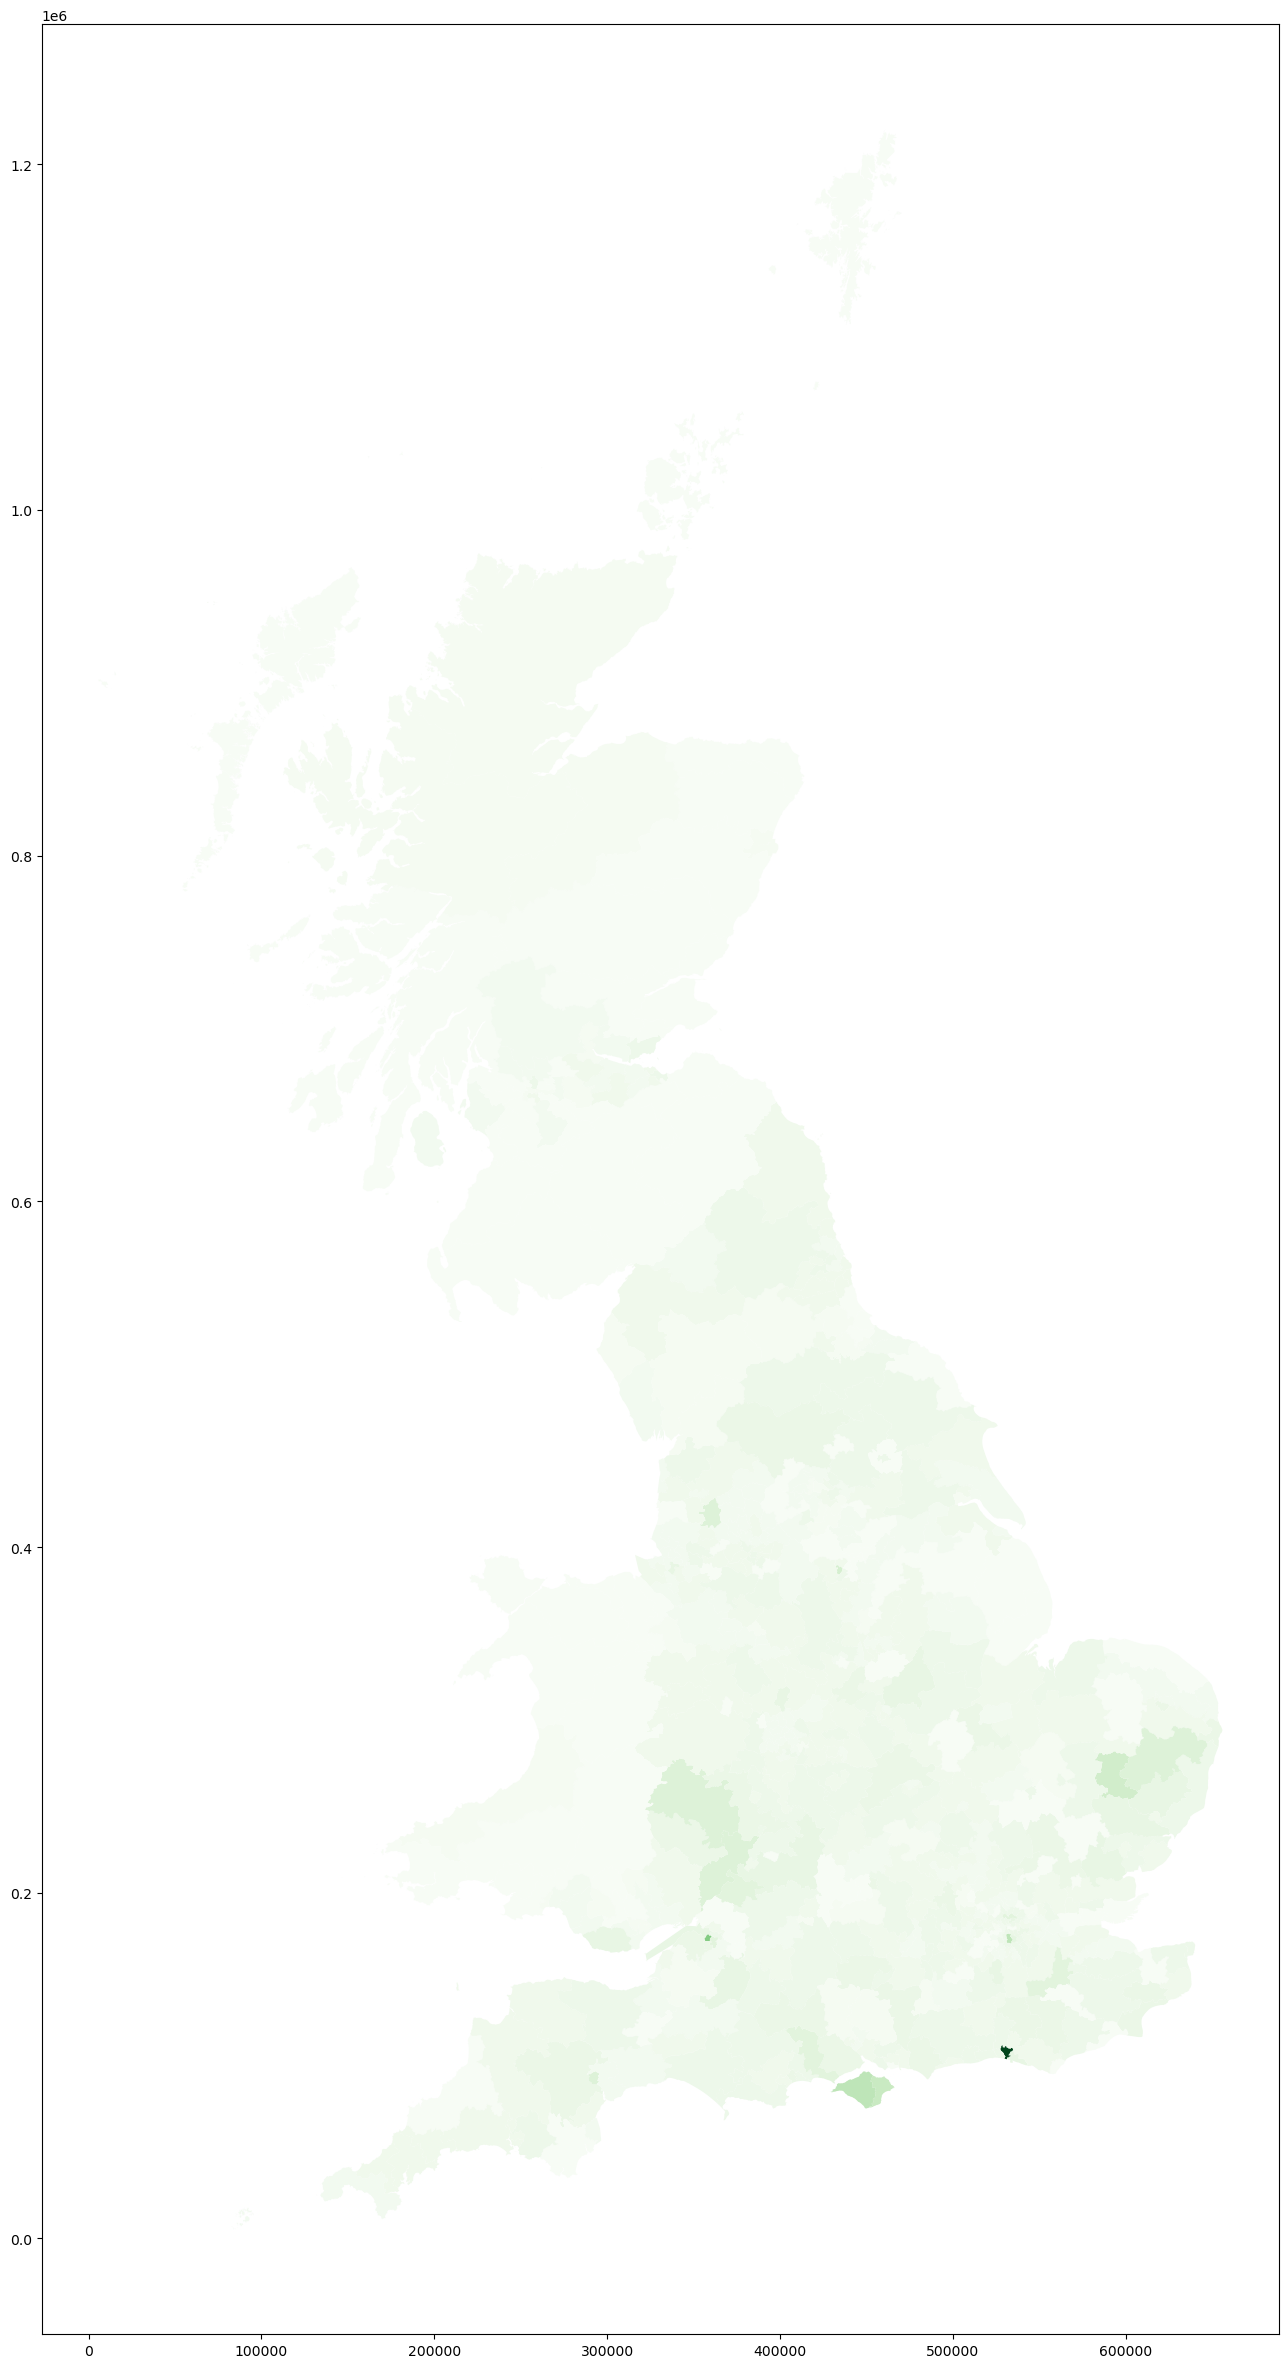

In [12]:
df.plot("grn_%_2019", cmap="Greens", figsize=(30,30))
plt.show()

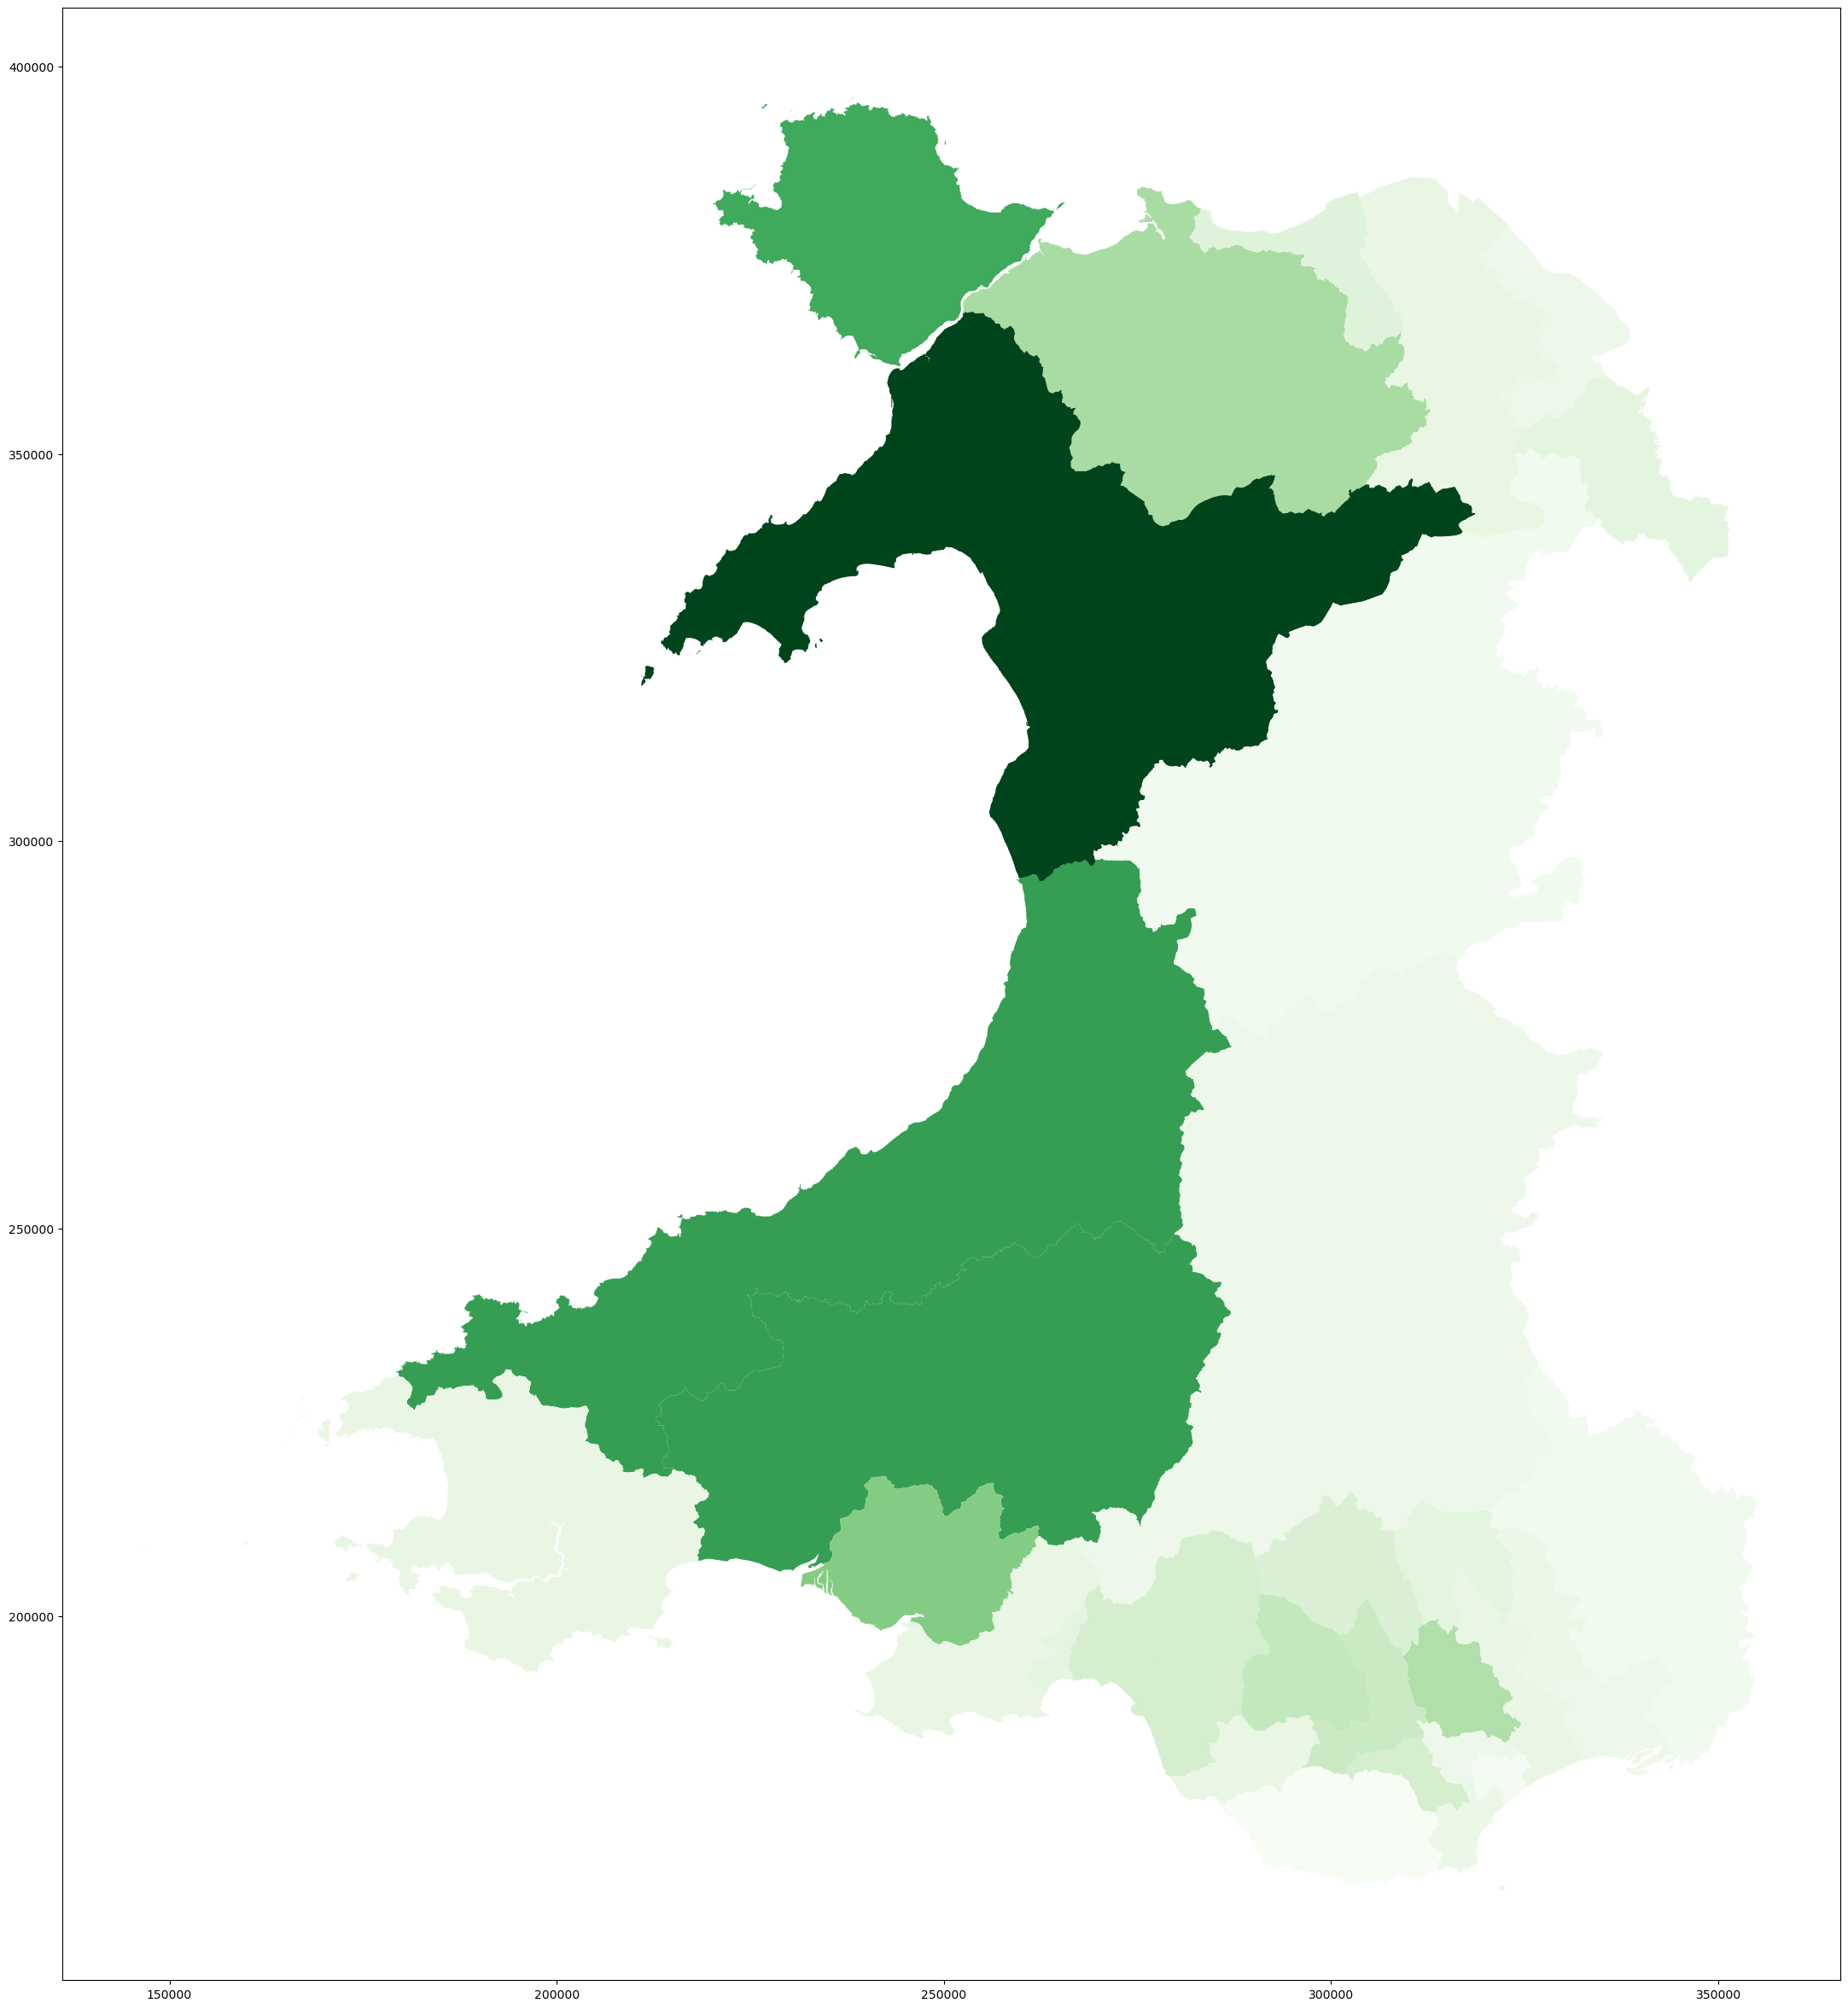

In [13]:
df[df["country"] == "Wales"].plot("pc_2019_%", cmap="Greens", figsize=(30,30))
plt.show()

In [24]:
pd.options.display.max_columns = None

In [27]:
corr = df.corr(numeric_only=True)

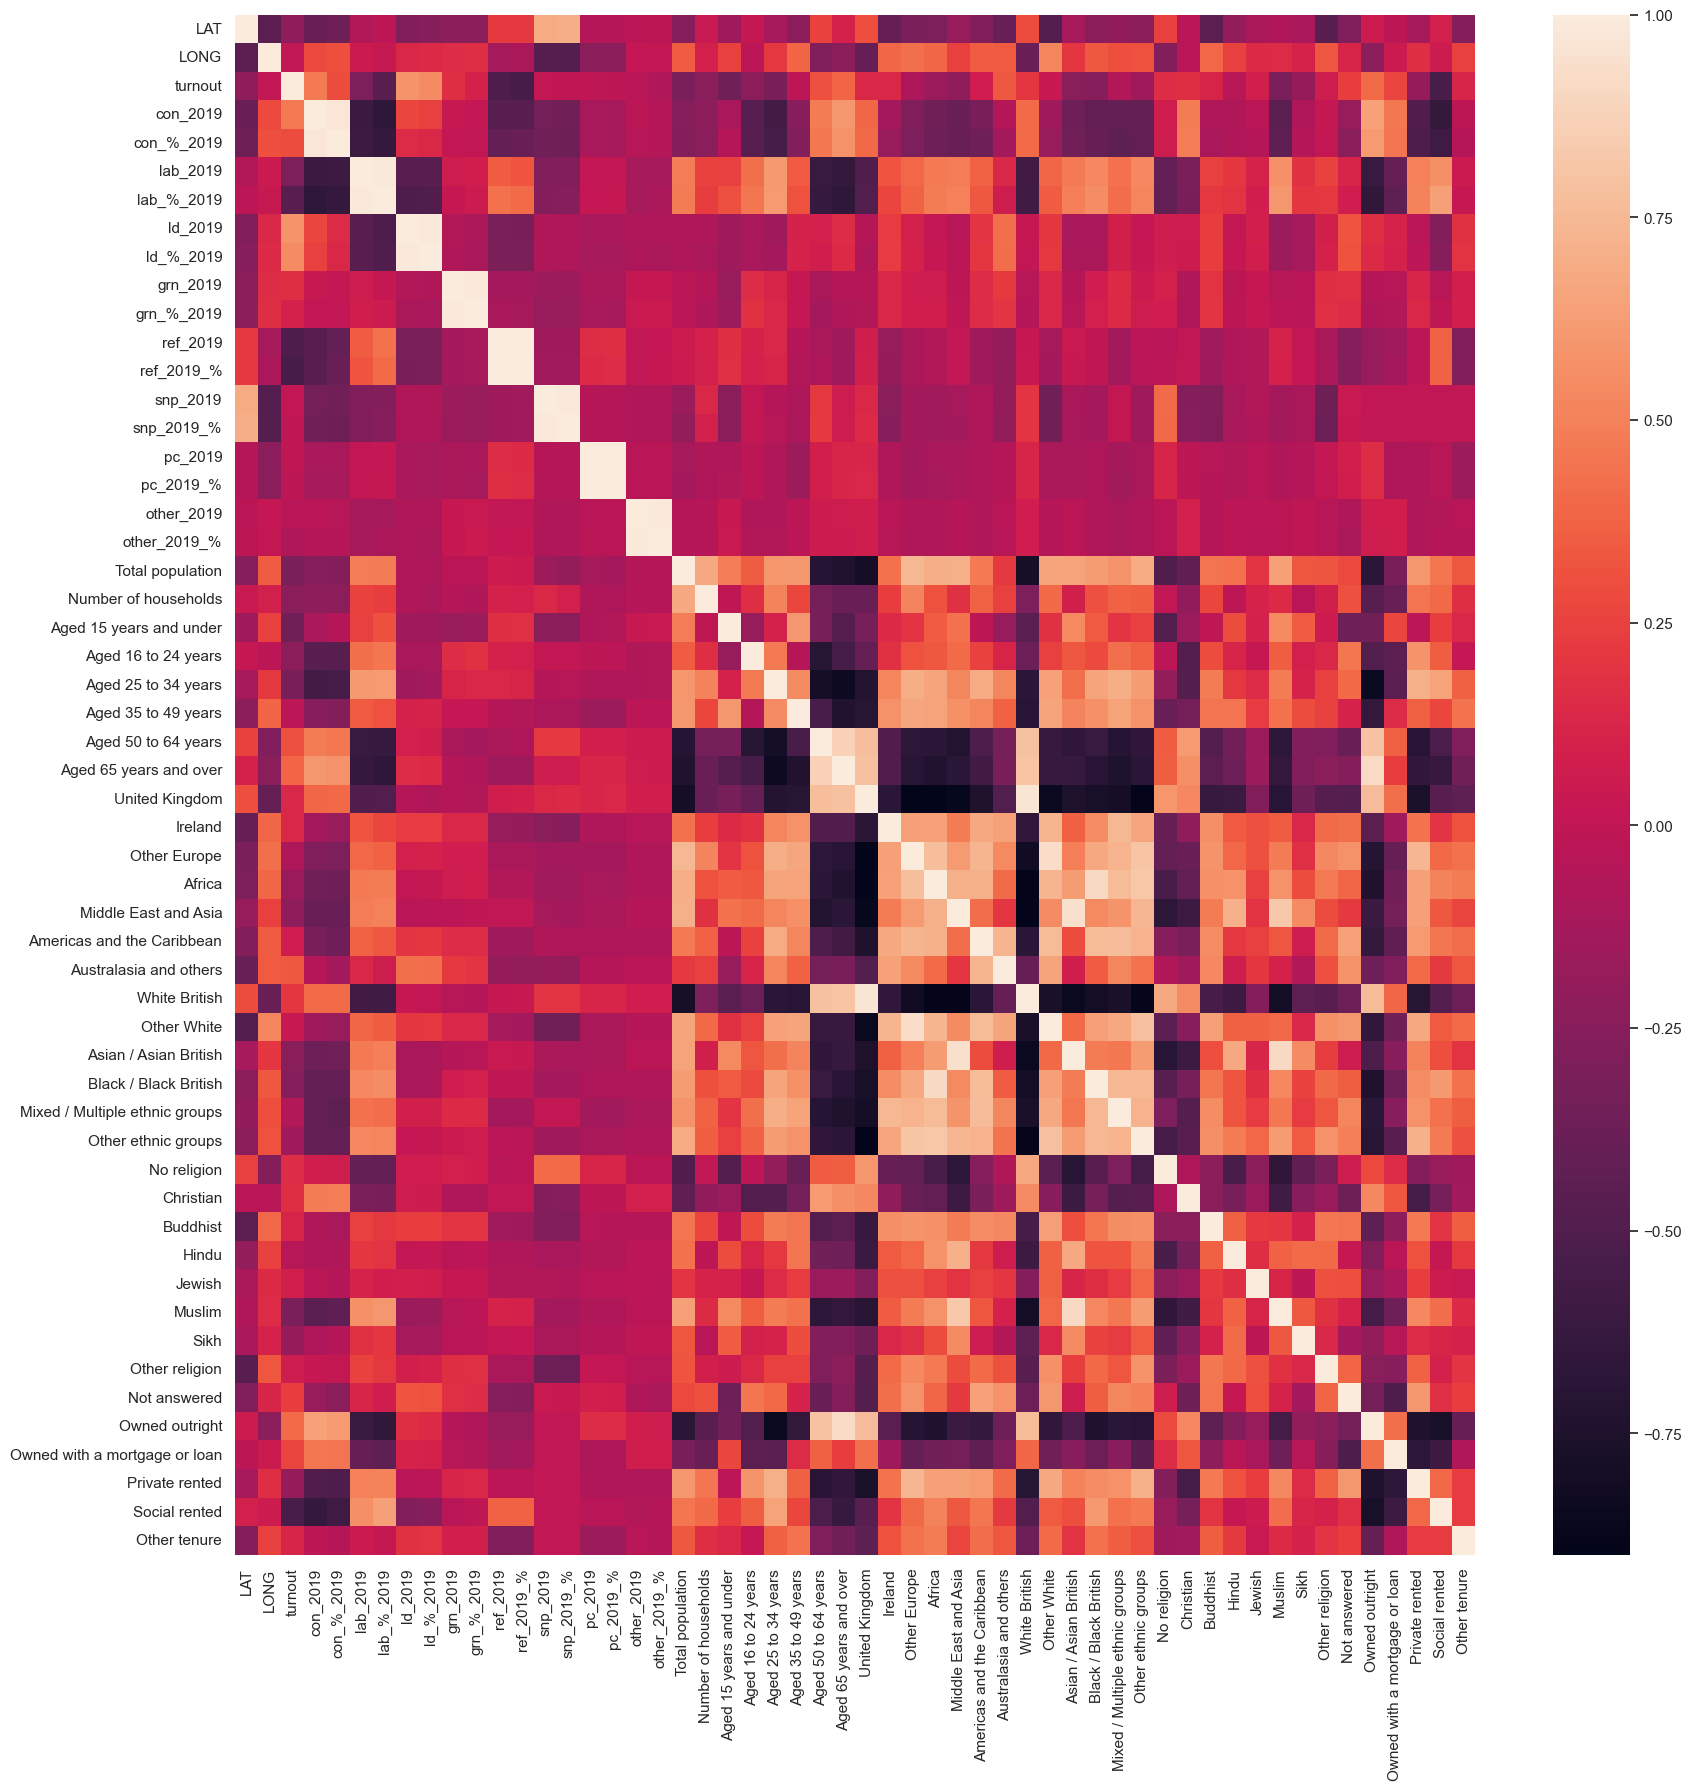

In [32]:
sns.set_theme(rc={'figure.figsize':(20,20)})
sns.heatmap(corr)

plt.show()

In [17]:
df.set_index("constituency", inplace=True)

In [14]:
party_colours = {"con":"#0087DC", "lab":"#E4003B", "ld":"#FAA61A", "grn":"#02A95B", "ref":"#12B6CF", "snp":"#FDF38E", "pc":"#005B54", "other":"#DCDCDC"}
colours = sns.color_palette(list(party_colours.values()))

In [15]:
def make_bar_plots(constituency:str):
    votes_2019 = df.loc[constituency][["con_2019", "lab_2019", "ld_2019", "grn_2019", "ref_2019", "snp_2019", "pc_2019", "other_2019"]]
    ages = df.loc[constituency, "Aged 15 years and under": "Aged 65 years and over"]
    ethnic_groups = df.loc[constituency, "White British": "Other ethnic groups"]
    national_origins = df.loc[constituency, "United Kingdom": "Australasia and others"]
    religions = df.loc[constituency, "No religion": "Not answered"]
    home_status = df.loc[constituency, "Owned outright": "Other tenure"]

    

    fig, axes = plt.subplots(3,2, figsize=(30,20))
    fig.suptitle(constituency)
    #fig.tight_layout()
    sns.barplot(x=list(votes_2019.index), y=votes_2019.values, ax=axes[0,0], palette=colours, hue=list(votes_2019.index), legend=False)
    axes[0,0].set_title("2019 Vote")
    
    sns.barplot(x=list(ages.index), y=ages.values, ax=axes[0,1])
    axes[0,1].set_title("Age")
    sns.barplot(x=list(ethnic_groups.index), y=ethnic_groups.values, ax=axes[1,0])
    axes[1,0].set_title("Ethnicity")
    sns.barplot(x=list(national_origins.index), y=national_origins.values, ax=axes[1,1])
    axes[1,1].set_title("Place of Birth")
    sns.barplot(x=list(religions.index), y=religions.values, ax=axes[2,0])
    axes[2,0].set_title("Religion")
    sns.barplot(x=list(home_status.index), y=home_status.values, ax=axes[2,1])
    axes[2,1].set_title("Housing Status")
    plt.show()

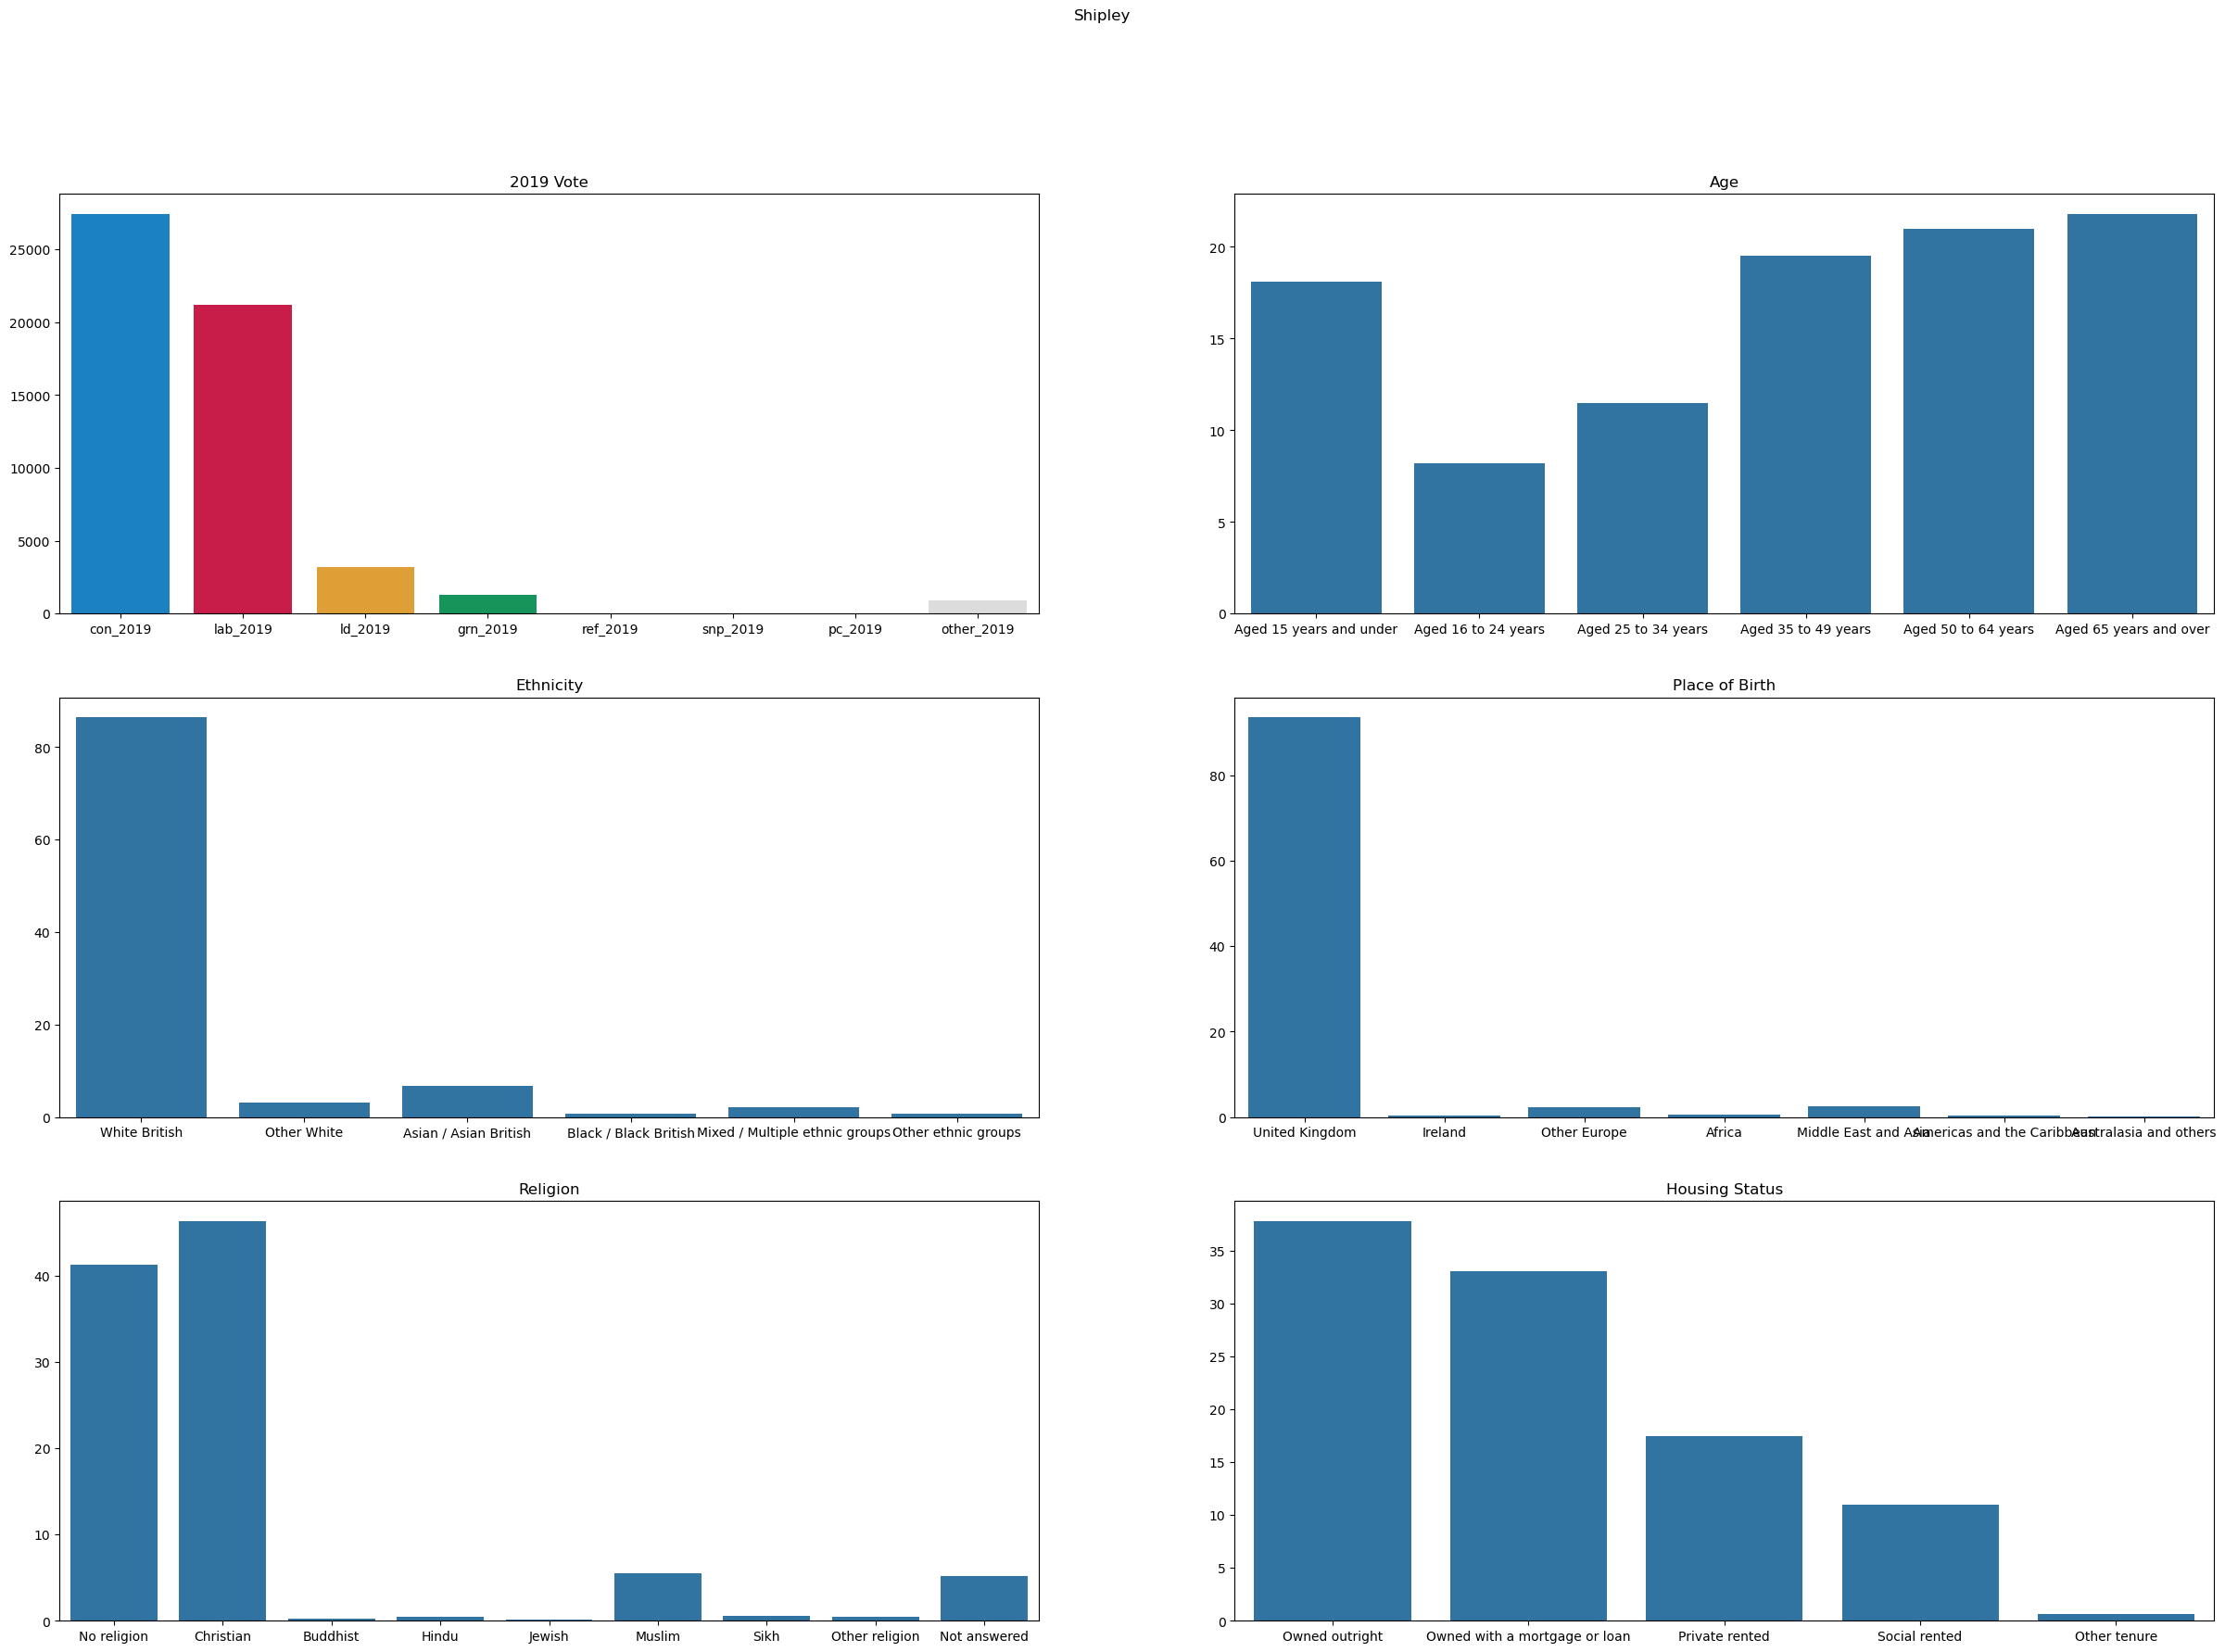

In [20]:
make_bar_plots("Shipley")